## Forest Fires in Brazil

Data will be used as provided in Kaggle data sets https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

Variable number is most important variable, this is the number of fires in each state ordered by month and year.

Variable data is unnecessary so later I will drop it from the data frame.

This notebook is done with the assumption that this data are correct and I will not further check the data on the web. Purpose of the notebook is to test my abilities not to make base for implementation of some public policies concerning forest fires.

In [57]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [58]:
#default encoding did not work so I have used latin1 encoding
#date column is parsed as datetime object, this column is basically unnecessary so later I will drop it
data = pd.read_csv('amazon.csv', encoding = "latin1", parse_dates=['date'])
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [59]:
data.shape

(6454, 5)

In [60]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [61]:
#as we can see all variables are in the correct format, possibly except number that can be,
# or even has to be an integer and not float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [62]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2016-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


In [63]:
#check number of the unique values in each column
for col in data.columns:
    print('Number of unique values for variable {} is: {}'.format(col, len(data[col].unique())))

Number of unique values for variable year is: 20
Number of unique values for variable state is: 23
Number of unique values for variable month is: 12
Number of unique values for variable number is: 1479
Number of unique values for variable date is: 20


In [64]:
#check names of the unique values in each column
for col in data.columns:
    print('Unique values in column {} are: {} {}'.format(col, '\n', data[col].unique()))
    print()

Unique values in column year are: 
 [1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]

Unique values in column state are: 
 ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']

Unique values in column month are: 
 ['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']

Unique values in column number are: 
 [  0.     10.     12.    ...   2.032 833.    623.   ]

Unique values in column date are: 
 ['1998-01-01T00:00:00.000000000' '1999-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000000000' '2001-01-01T00:00:00.000000000'
 '2002-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.0

In [65]:
#something is wrong with the values for number variable. We can not have 1.013 number
#of fires. Number has to be whole number, integer.
data.number.value_counts()

0.000      617
1.000      237
2.000      174
3.000      143
4.000      115
5.000       93
9.000       88
7.000       85
6.000       84
12.000      65
18.000      62
8.000       61
13.000      59
10.000      57
14.000      56
15.000      55
11.000      52
16.000      46
20.000      44
22.000      44
25.000      42
21.000      41
19.000      41
30.000      38
23.000      38
33.000      38
37.000      37
17.000      37
32.000      35
36.000      34
          ... 
1.597        1
2.681        1
475.000      1
631.000      1
834.000      1
490.000      1
421.000      1
790.000      1
3.119        1
6.228        1
4.078        1
5.149        1
1.013        1
2.900        1
4.968        1
2.173        1
2.579        1
1.898        1
527.000      1
3.353        1
4.339        1
1.195        1
2.558        1
3.970        1
2.053        1
1.461        1
6.316        1
5.882        1
572.000      1
6.326        1
Name: number, Length: 1479, dtype: int64

In [66]:
#clearly it does not make sense to have 1.013 fires. 
#Probably this is 1013.00 fires and period that supposed to be thousand
#separator is interpreted by the collector of the data as decimal separator.
data.loc[data['number'] == 1.195]

,year,state,month,number,date
2102,2007,Goias,Outubro,1.195,2007-01-01


### Reloading the data with thousand seperator

In [73]:
#I will reload the data with thousands separator and without unnessessary date column
#In order to avoid that I have introduced thousand separator
data = pd.read_csv('amazon.csv', encoding = "latin1", thousands = '.', 
                   usecols = ['year', 'state','month', 'number'])
data.head()

,year,state,month,number
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0


In [74]:
#now we have int64 type for number column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 4 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null int64
dtypes: int64(2), object(2)
memory usage: 201.8+ KB


In [75]:
data.shape

(6454, 4)

In [76]:
for col in data.columns:
    print('Number of unique values for variable {} is: {}'.format(col, len(data[col].unique())))

Number of unique values for variable year is: 20
Number of unique values for variable state is: 23
Number of unique values for variable month is: 12
Number of unique values for variable number is: 1416


In [77]:
for col in data.columns:
    print('Unique values in column {} are: {} {}'.format(col, '\n', data[col].unique()))
    print()

Unique values in column year are: 
 [1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]

Unique values in column state are: 
 ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']

Unique values in column month are: 
 ['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']

Unique values in column number are: 
 [   0   10   12 ... 2032  833  623]



In [78]:
#renaming months in english
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
dict_months = {i:k for k,i in zip(months, data.month.unique())}
dict_months

{'Janeiro': 'January',
 'Fevereiro': 'February',
 'Março': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'November',
 'Dezembro': 'December'}

In [79]:
data['month'] = data['month'].map(dict_months)
data.head()

,year,state,month,number
0,1998,Acre,January,0
1,1999,Acre,January,0
2,2000,Acre,January,0
3,2001,Acre,January,0
4,2002,Acre,January,0


In [80]:
data['month'].value_counts()

January      541
February     540
April        540
September    540
May          540
August       540
July         540
November     540
October      540
March        540
June         540
December     513
Name: month, dtype: int64

In [84]:
#with grouping by number of fires we can see how many fires were by the year, month and state
data.groupby('year')['number'].sum()

year
1998    123881
1999    132526
2000     97541
2001    137926
2002    220015
2003    208476
2004    248928
2005    224294
2006    123327
2007    206412
2008    117993
2009    111763
2010    223228
2011    131271
2012    163353
2013    105572
2014    170259
2015    209296
2016    171132
2017    246289
Name: number, dtype: int64

In [85]:
data.number.sum()

3373482

In [87]:
data.groupby('month')['number'].sum()

month
April          28364
August        740841
December      152596
February       30952
January        52587
July          217620
June          111405
March          35118
May            46083
November      312326
October       629665
September    1015925
Name: number, dtype: int64

In [88]:
data.groupby('state')['number'].sum()

state
Acre                 68345
Alagoas               4644
Amapa                25116
Amazonas            117467
Bahia               226979
Ceara                80162
Distrito Federal      3561
Espirito Santo        6546
Goias               111970
Maranhao            375279
Mato Grosso         767890
Minas Gerais        169223
Paraiba              65206
Pará                577841
Pernambuco           24498
Piau                178707
Rio                  50021
Rondonia            185387
Roraima              29454
Santa Catarina       27209
Sao Paulo            62308
Sergipe               3237
Tocantins           212432
Name: number, dtype: int64

## Visualization

Visualization can be done by year, state and month in relation with the number of fires.
Fist I will use all values to make complete bar chart for each variable and later I will use just 10 biggest values and make bar chart of this values.

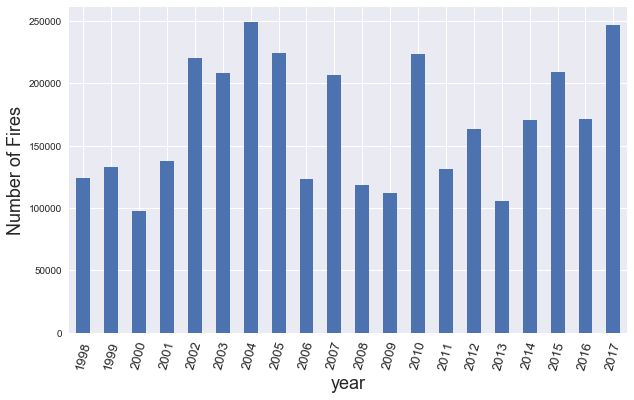

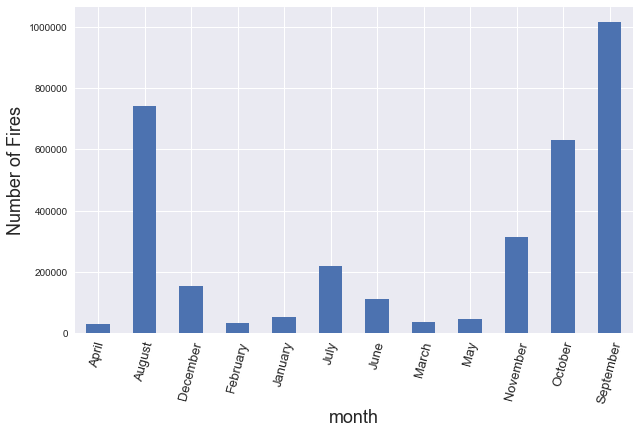

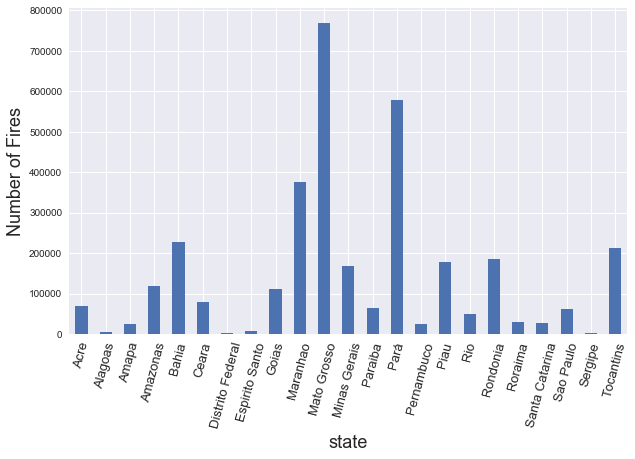

In [89]:
for col in ['year', 'month', 'state']:
    fig = plt.figure(figsize=(10,6))
    data.groupby(col)['number'].sum().plot(kind='bar')
    plt.ylabel('Number of Fires', fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.xticks(rotation=75, fontsize=13)
    

### Top 10 States by the number of fires

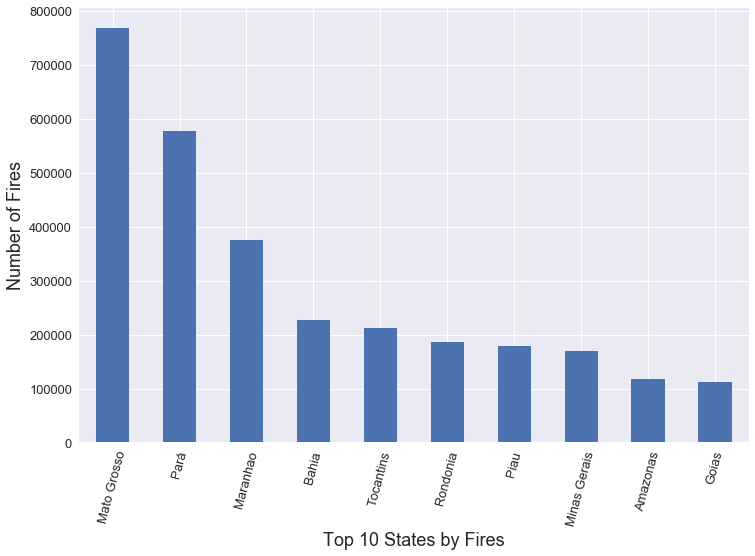

In [90]:
plt.figure(figsize=(12,8))
data.groupby('state')['number'].sum().sort_values(ascending=False).nlargest(n=10).plot(kind='bar')
plt.ylabel('Number of Fires', fontsize=18)
plt.xlabel('Top 10 States by Fires', fontsize=18)
plt.xticks(rotation=75, fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Top 10 years by the number of fires

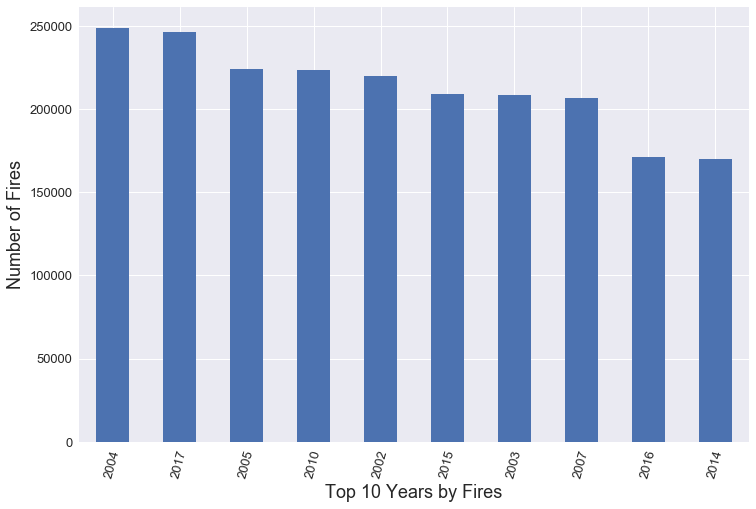

In [91]:
plt.figure(figsize=(12,8))
data.groupby('year')['number'].sum().sort_values(ascending=False).nlargest(n=10).plot(kind='bar')
plt.ylabel('Number of Fires', fontsize=18)
plt.xlabel('Top 10 Years by Fires', fontsize=18)
plt.xticks(rotation=75, fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Months by the number of fires

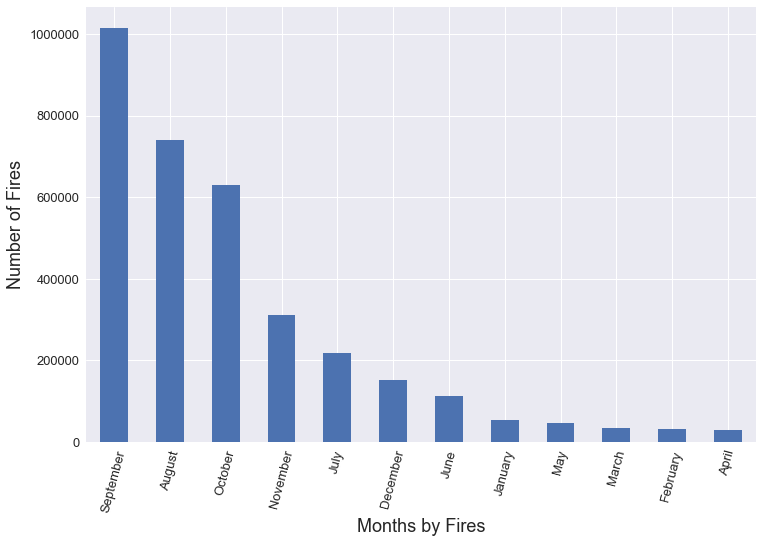

In [96]:
plt.figure(figsize=(12,8))
data.groupby('month')['number'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Fires', fontsize=18)
plt.xlabel('Months by Fires', fontsize=18)
plt.xticks(rotation=75, fontsize=13)
plt.yticks(fontsize=13)
plt.show()